# TASK 3 - FRAUD TRANSACTION DETECTION

Business Understanding

Use a dataset of credit card transactions and
build a model that can identify potentially
fraudulent transactions

Data Mining

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Importing dataset and displaying first five values

In [2]:
dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Displaying last five values

In [3]:
dataframe.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Some information about dataset

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Shape of dataset

In [5]:
dataframe.shape

(284807, 31)

Datatype of columns

In [6]:
print(f'The type of columns:\n{dataframe.dtypes}')

The type of columns:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Data Cleaning

Checking if there are any null values

In [7]:
dataframe.isnull().values.any()

False

Feature Engineering

In [8]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Defining the Genuine and Fraud Transactions

In [9]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


Some Data Visualization

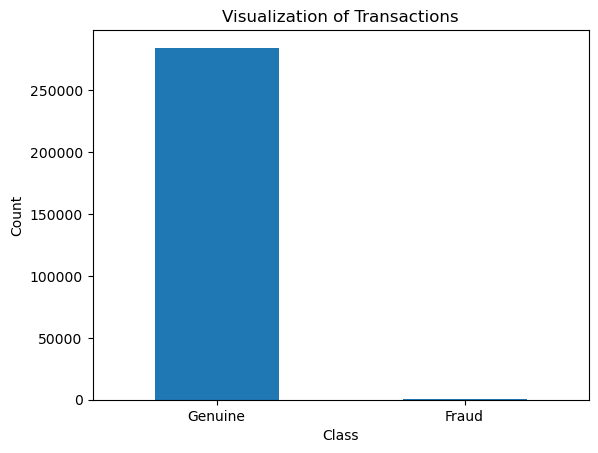

In [10]:
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Transactions")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

<Axes: title={'center': 'Correlation with Class '}>

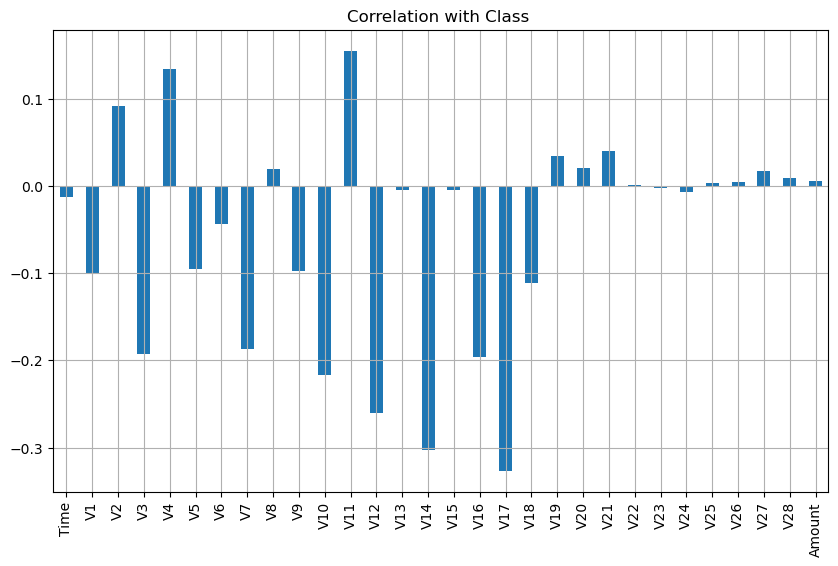

In [11]:
dataframe.drop('Class',axis=1).corrwith(dataframe.Class).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Class ")

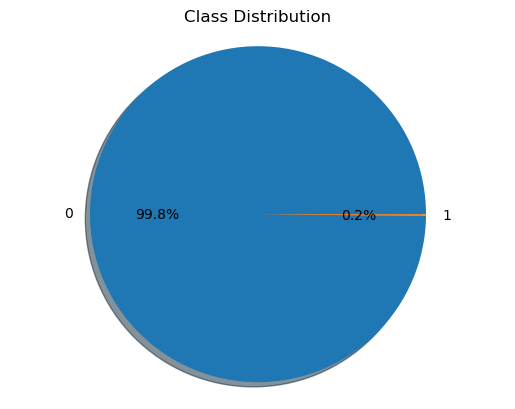

In [12]:
plt.pie(dataframe['Class'].value_counts().values,autopct='%1.1f%%',labels=dataframe['Class'].value_counts().index,shadow=True)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

Reshape the 'Time' and 'Amount' columns

In [13]:
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [14]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Model Building

Splitting Dataset into Training and Testing set

In [15]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


Using Random Forest Classifier model accuracy is 99%

In [24]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [25]:
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.9566962770502


In [26]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

Using Logistic Regression Model also accuracy is 99%

In [27]:
model = LogisticRegression()
model.fit(train_X,train_Y)

LogisticRegression()

In [28]:
Y_pred = model.predict(test_X)

In [29]:
accuracy = accuracy_score(test_Y,Y_pred)
confusion_mat = confusion_matrix(test_Y,Y_pred)
classification_rep = classification_report(test_Y,Y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix : ')
print(confusion_mat)
print('Classification Report: ')
classification_rep

Accuracy: 0.9992626663389628
Confusion Matrix : 
[[85295    12]
 [   51    85]]
Classification Report: 


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85307\n           1       0.88      0.62      0.73       136\n\n    accuracy                           1.00     85443\n   macro avg       0.94      0.81      0.86     85443\nweighted avg       1.00      1.00      1.00     85443\n'